# SKLearn in PowerBI

This notebook contains the code for building an sklearn pipeline to be embedded in Power BI to create an interface for interacting with the model. It consists of a number of steps: 
* Imports
* Loading the Titanic Dataset
* Setting up the Preprocessing
* Filtering the dataset (selecting columns and dropping rows with missing values)
* Building and Fitting the Pipeline
* Visualizing the Model Output
* Serializing the Pipeline

In [152]:
# Imports

from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier


In [154]:
# Load the dataset
X,y = fetch_openml("Titanic",version=1,as_frame = True, return_X_y = True, parser='auto')


In [155]:
# Create the Preprocessing
categorical_feature = ["sex"]
categorical_transformer = Pipeline(
    steps = [
        ("encoder",OneHotEncoder())
    ])
numerical_feature = ["age"]
numerical_transformer = Pipeline(
    steps = [
        ("MinMax",MinMaxScaler())
    ])

preprocessor = ColumnTransformer(
    transformers = [
        ("categorical", categorical_transformer, categorical_feature),
        ("numerical", numerical_transformer, numerical_feature)
    ])



In [156]:
#Select only age and sex as predictors
X = X[["age","sex"]]
#Drop rows with missing values
X = X.dropna()
#Keep only observations corresponding to rows without missing values
y = y[X.index]

# Create the Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size = .2)


In [157]:
# Build the Pipeline
clf = Pipeline(
    steps = [
        ("preprocessor", preprocessor), 
        ("classifier", GradientBoostingClassifier())
    ]
)

# Fit the Pipeline
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84       123
           1       0.76      0.78      0.77        87

    accuracy                           0.81       210
   macro avg       0.80      0.81      0.80       210
weighted avg       0.81      0.81      0.81       210



<Axes: xlabel='sex', ylabel='age'>

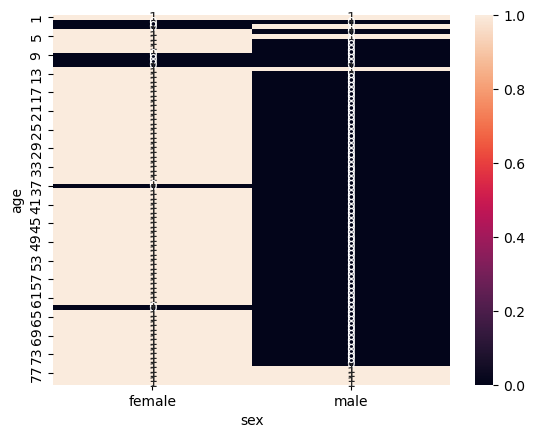

In [160]:
from pandas import DataFrame

# Create a DataFrame with all possible ages
ages = DataFrame({'age':range(1,80,1)})

# Create a DataFrame with all possible sexes
sexes = DataFrame({'sex':["male","female"]})    

# Create a DataFrame with all possible combinations. 
combinations = ages.merge(sexes, how='cross')

# Predict survival for combinations
combinations["predicted_survival"] = clf.predict(combinations)

sns.heatmap(pd.pivot_table(combinations, values="predicted_survival", index=["age"],columns=["sex"]), annot=True)

In [161]:
# Serialize the model
from joblib import dump
dump(clf, r"randomforest.joblib") 


['randomforest.joblib']